# Data Cleaning and Transformation of Netflix Content Data

### Description:

👉This project focuses on the cleaning and transformation of a Netflix content dataset, covering content added between 2008 and 2021. The dataset contains information on movies, TV shows, and original content available on Netflix. The initial dataset has been pre-processed to remove unnecessary noise, but further cleaning is required to optimize it for analysis.

### Objectives:

1. **Data Quality Improvement:** Identify and address missing, incomplete, and duplicate data to ensure a high-quality dataset.
2. **Data Structuring:** Organize the dataset by removing unnecessary columns and splitting complex data entries for better clarity and usability.
2. **Data Type Optimization:** Convert data types where necessary, such as transforming the "release_year" column to an integer format for accurate analysis.
3. **Enhanced Data Insights:** Prepare the dataset for effective visualization by creating new columns that allow for more granular analysis, such as isolating genres from the “listed_in” column.
4. **Data Results:** Show the most important results that you consider important in the dataset and visualize it.

## Setup

### Importing the necessary libraries I will use for this project

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import seaborn as sns

### Read data and obtain statistical information.

In [3]:
data = pd.read_csv('C:/Users/juang/OneDrive/Escritorio/datasets/netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


### Looking at the number of duplicate values in columns

In [6]:
data.shape

(8790, 10)

In [7]:
data.duplicated().value_counts()

False    8790
dtype: int64

### Check for duplicate data in the show_id column

In [8]:
data["show_id"].duplicated().sum()

0

### Amount of data by type

In [9]:
count_types = data['type'].value_counts().reset_index()


count_types.columns = ['Tipo', 'Conteo']


count_types.head()

,Tipo,Conteo
0,Movie,6126
1,TV Show,2664


### Null data

In [10]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Value counts by "Country"

In [11]:
data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

### Years in which the greatest number of films were made 

In [12]:
film_making = data[data['type'] == 'Movie']['release_year'].value_counts().reset_index()

film_making.columns = ['Country', 'Quantity of Movies']

film_making.head(10)

,Country,Quantity of Movies
0,2018,767
1,2017,765
2,2016,658
3,2019,633
4,2020,517
5,2015,396
6,2021,277
7,2014,264
8,2013,225
9,2012,173


### Years in which fewer films were made

In [13]:
film_making_low = film_making.sort_values(by='Quantity of Movies', ascending=True)

film_making_low.head(10)

,Country,Quantity of Movies
72,1947,1
67,1959,1
68,1966,1
71,1963,1
70,1946,1
69,1961,1
66,1969,2
65,1956,2
64,1970,2
63,1964,2


In [14]:
tv_production = data[data['type'] == 'TV Show']['release_year'].value_counts().reset_index()

tv_production.columns = ['Country', 'Quantity of TV Production']

tv_production.head(10)

,Country,Quantity of TV Production
0,2020,436
1,2019,397
2,2018,379
3,2021,315
4,2017,265
5,2016,243
6,2015,159
7,2014,88
8,2012,63
9,2013,61


### Years in which the greatest number of television productions were made

In [15]:
tv_production_low = tv_production.sort_values(by='Quantity of TV Production', ascending=True)

tv_production_low.head(10)

,Country,Quantity of TV Production
45,1963,1
34,1967,1
35,1977,1
36,1981,1
37,1979,1
38,1985,1
33,1989,1
40,1974,1
41,1972,1
42,1945,1


### Oldest Movie or TV Show on Netflix 

In [16]:
old_serie = data['release_year'].min()
data[data['release_year'] == old_serie]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
421,s4251,TV Show,Pioneers: First Women Filmmakers*,Not Given,Pakistan,12/30/2018,1925,TV-14,1 Season,TV Shows


### Newest Movie or TV Shows on Netflix

In [17]:
new_serie = data['release_year'].max()
data[data['release_year'] == new_serie]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
6920,s1461,TV Show,Monarca,Not Given,Mexico,1/1/2021,2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh..."
6922,s1467,Movie,The Minimalists: Less Is Now,Not Given,United States,1/1/2021,2021,TV-14,54 min,Documentaries
6948,s1552,TV Show,Hilda,Not Given,United Kingdom,12/14/2020,2021,TV-Y7,2 Seasons,Kids' TV
6992,s1697,TV Show,Polly Pocket,Not Given,Canada,11/15/2020,2021,TV-Y,2 Seasons,Kids' TV


### Oldest Movie or TV Shows added

In [18]:
old_serie_added = data['date_added'].min()
data[data['date_added'] == old_serie_added]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4253,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,1/1/2008,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers"


### Newest Movie or TV Shows added

In [19]:
new_serie_added = data['date_added'].max()
data[data['date_added'] == new_serie_added]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
41,s90,TV Show,Mighty Raju,Not Given,Pakistan,9/9/2021,2017,TV-Y7,4 Seasons,Kids' TV
111,s91,Movie,Paradise Hills,Alice Waddington,Spain,9/9/2021,2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers"
112,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",France,9/9/2021,2021,TV-14,92 min,"Documentaries, International Movies"
132,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,Not Given,9/9/2021,2021,PG-13,96 min,"Documentaries, Sports Movies"


In [20]:
country = data.groupby('country')['type'].value_counts().rename('count').reset_index()
country = country.sort_values(by='count', ascending=False)
country

,country,type,count
130,United States,Movie,2395
47,India,Movie,976
131,United States,TV Show,845
128,United Kingdom,Movie,387
86,Pakistan,TV Show,350
...,...,...,...
51,Iran,Movie,1
40,Greece,Movie,1
41,Guatemala,Movie,1
111,Soviet Union,Movie,1


### Countries with the most movies

In [21]:
top_10_country_movies = country[(country['country'] != 'Not Given') & (country['type'] == 'Movie')].head(10)
top_10_country_movies

,country,type,count
130,United States,Movie,2395
47,India,Movie,976
128,United Kingdom,Movie,387
15,Canada,Movie,187
34,France,Movie,148
112,Spain,Movie,129
30,Egypt,Movie,109
80,Nigeria,Movie,96
72,Mexico,Movie,90
60,Japan,Movie,87


### Countries with the most TV Shows 

In [22]:
top_10_country_tv = country[(country['country'] != 'Not Given') & (country['type'] == 'TV Show')].head(10)
top_10_country_tv

,country,type,count
131,United States,TV Show,845
86,Pakistan,TV Show,350
129,United Kingdom,TV Show,251
59,Japan,TV Show,172
109,South Korea,TV Show,165
16,Canada,TV Show,84
48,India,TV Show,81
119,Taiwan,TV Show,71
35,France,TV Show,65
3,Australia,TV Show,53


### Director with the most movies or TV shows

In [23]:
director = data[data['director'] != 'Not Given'][['type','director']].value_counts().rename('count').reset_index()
director.sort_values(by='count', ascending=False)

,type,director,count
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14
...,...,...,...
2091,Movie,Richard Curtis,1
2092,Movie,"William Wyler, John Sturges",1
2093,Movie,Richard Donner,1
2094,Movie,"Richard Finn, Tim Maltby",1


### Director with the most films 

In [24]:
top_10_director_movies = director [director ['type'] == 'Movie'].head(10)
top_10_director_movies

,type,director,count
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14
6,Movie,Cathy Garcia-Molina,13
7,Movie,Jay Chapman,12
8,Movie,Martin Scorsese,12
9,Movie,Youssef Chahine,12
10,Movie,Steven Spielberg,11


### Director with the most TV Shows 

In [25]:
top_10_director_tv = director [director ['type'] == 'TV Show'].head(10)
top_10_director_tv

,type,director,count
5,TV Show,Alastair Fothergill,14
57,TV Show,"Mark Thornton, Todd Kauffman",5
273,TV Show,Stan Lathan,3
733,TV Show,Ken Burns,2
747,TV Show,Shin Won-ho,2
750,TV Show,Rob Seidenglanz,2
805,TV Show,Iginio Straffi,2
806,TV Show,Hsu Fu-chun,2
846,TV Show,"David Chuang, Chen Kuan-chung",1
853,TV Show,David Ayer,1


### Amount of unique data per category 

In [26]:
unique_directors = data['director'].nunique()
unique_release_years = data['release_year'].nunique()
unique_types = data['type'].nunique()
unique_duration= data['duration'].nunique()
unique_country = data['country'].nunique()
unique_listedin = data['listed_in'].nunique()
result_table = pd.DataFrame({
    'Director': [unique_directors],
    'Release Year': [unique_release_years],
    'Type': [unique_types],
    'Duration' : [unique_duration],
    'Country' :[unique_country],
    'Genre': [unique_listedin]
}, index=['Amount of data'])


result_table.head()


,Director,Release Year,Type,Duration,Country,Genre
Amount of data,4528,74,2,220,86,513


### Rating type by type 

In [27]:
rating = data.groupby(['rating', 'type']).size().reset_index(name='count')
rating = rating.sort_values(by='count', ascending=False)
rating

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
13,TV-MA,TV Show,1143
6,R,Movie,797
9,TV-14,TV Show,730
14,TV-PG,Movie,540
5,PG-13,Movie,490
15,TV-PG,TV Show,321
4,PG,Movie,287
19,TV-Y7,TV Show,194


### Highest rating in movies 

In [28]:
top_10_rating_movie = rating [rating ['type'] == 'Movie'].head(10)
top_10_rating_movie

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


### Higher type of rating in TV Shows 

In [29]:
top_10_rating_tv = rating [rating ['type'] == 'TV Show'].head(10)
top_10_rating_tv

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


### Greater number of genres 

In [30]:
genre = data.groupby(['listed_in', 'type']).size().reset_index(name='count')
genre = genre.sort_values(by='count', ascending=False)
genre

,listed_in,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
...,...,...,...
192,"Comedies, Cult Movies, Sci-Fi & Fantasy",Movie,1
190,"Comedies, Cult Movies, LGBTQ Movies",Movie,1
400,"International TV Shows, Spanish-Language TV Sh...",TV Show,1
188,"Comedies, Cult Movies, Independent Movies",Movie,1


In [31]:
top_10_genre_movie = genre [genre ['type'] == 'Movie'].head(10)
top_10_genre_movie

,listed_in,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


### Greater number of genres in movies 

In [32]:
top_10_genre_tv = genre [genre ['type'] == 'TV Show'].head(10)
top_10_genre_tv

,listed_in,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,121
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


### Movies by title with longest duration 

In [33]:
data['duration_extracted'] = data['duration'].str.extract('(\d+)').astype(float)
result_table = data[data ['type'] == 'Movie'].sort_values(by='duration_extracted', ascending=False)
result_table_ = result_table[['type', 'title', 'duration']].head(10)
result_table_

,type,title,duration
7822,Movie,Black Mirror: Bandersnatch,312 min
151,Movie,Headspace: Unwind Your Mind,273 min
2020,Movie,The School of Mischief,253 min
2018,Movie,No Longer kids,237 min
2009,Movie,Lock Your Girls In,233 min
2017,Movie,Raya and Sakina,230 min
227,Movie,Once Upon a Time in America,229 min
5814,Movie,Sangam,228 min
1035,Movie,Lagaan,224 min
3322,Movie,Jodhaa Akbar,214 min


### TV Show by title with longest duration 

In [34]:
data['duration_extracted'] = data['duration'].str.extract('(\d+)').astype(float)
result_table = data[data ['type'] == 'TV Show'].sort_values(by='duration_extracted', ascending=False)
result_table[['type', 'title', 'duration']].head(10)

,type,title,duration
6697,TV Show,Grey's Anatomy,17 Seasons
1971,TV Show,Supernatural,15 Seasons
7987,TV Show,NCIS,15 Seasons
7816,TV Show,COMEDIANS of the world,13 Seasons
6884,TV Show,Heartland,13 Seasons
8164,TV Show,Criminal Minds,12 Seasons
8024,TV Show,Trailer Park Boys,12 Seasons
8391,TV Show,Cheers,11 Seasons
7018,TV Show,LEGO Ninjago: Masters of Spinjitzu,10 Seasons
8311,TV Show,Danger Mouse: Classic Collection,10 Seasons


### Most performed genres by each country 

In [35]:
genre_country_count = data.groupby(['country', 'listed_in']).size().reset_index(name='count')
idx = genre_country_count.groupby(['country'])['count'].idxmax()
most_watched_genre_by_country = genre_country_count.loc[idx].sort_values(by='count', ascending=False).head(10)
most_watched_genre_by_country

,country,listed_in,count
1839,United States,Documentaries,269
602,India,"Comedies, Dramas, International Movies",124
783,Japan,"Anime Series, International TV Shows",76
1318,South Korea,"International TV Shows, Korean TV Shows, Roman...",63
1604,United Kingdom,Documentaries,47
1152,Pakistan,Kids' TV,39
387,Egypt,"Comedies, International Movies",32
1005,Not Given,Children & Family Movies,32
1433,Taiwan,"International TV Shows, Romantic TV Shows, TV ...",31
961,Nigeria,"Dramas, International Movies",25


### Total content type on Netflix 

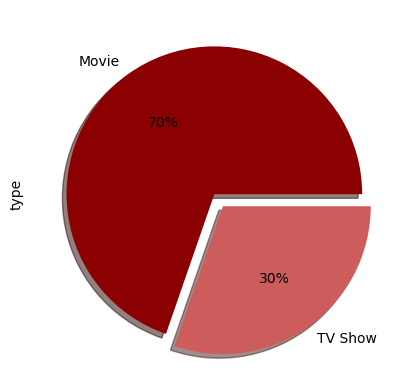

In [36]:
data.type.value_counts().plot(kind="pie",autopct="%0.0f%%",explode=[0,0.1],shadow=True,colors=['#8B0000', '#CD5C5C']);

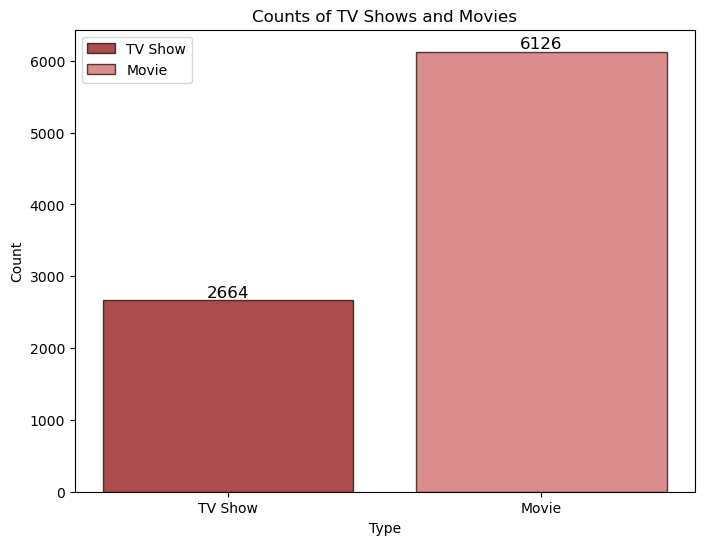

In [37]:
grouped_data = data.groupby('type').size().reset_index(name='count')
tv_shows = grouped_data[grouped_data['type'] == 'TV Show']
movies = grouped_data[grouped_data['type'] == 'Movie']
plt.figure(figsize=(8,6))
plt.bar(tv_shows['type'],tv_shows['count'],label='TV Show',color='#8B0000',alpha=0.7,edgecolor='black')
plt.bar(movies['type'],movies['count'],label='Movie',color='#CD5C5C',alpha=0.7,edgecolor='black')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts of TV Shows and Movies')
plt.legend()
for i,count in enumerate(tv_shows['count']):
    plt.text(i,count,str(count),ha='center',va='bottom',fontsize=12,color='black')
    
for i,count in enumerate(movies['count']):
    plt.text(1+i,count,str(count),ha='center',va='bottom',fontsize=12,color='black') 

### Quantity per year on Netflix 

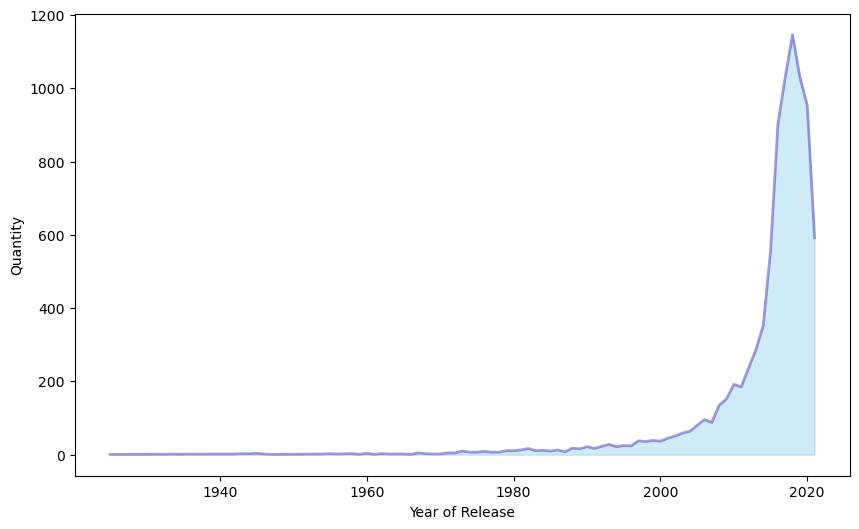

In [40]:
released_year = data.release_year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.fill_between(released_year.index, released_year, color="skyblue", alpha=0.4)
plt.plot(released_year.index, released_year, color="Slateblue", alpha=0.6, linewidth=2)
plt.xlabel('Year of Release')
plt.ylabel('Quantity')
plt.show()

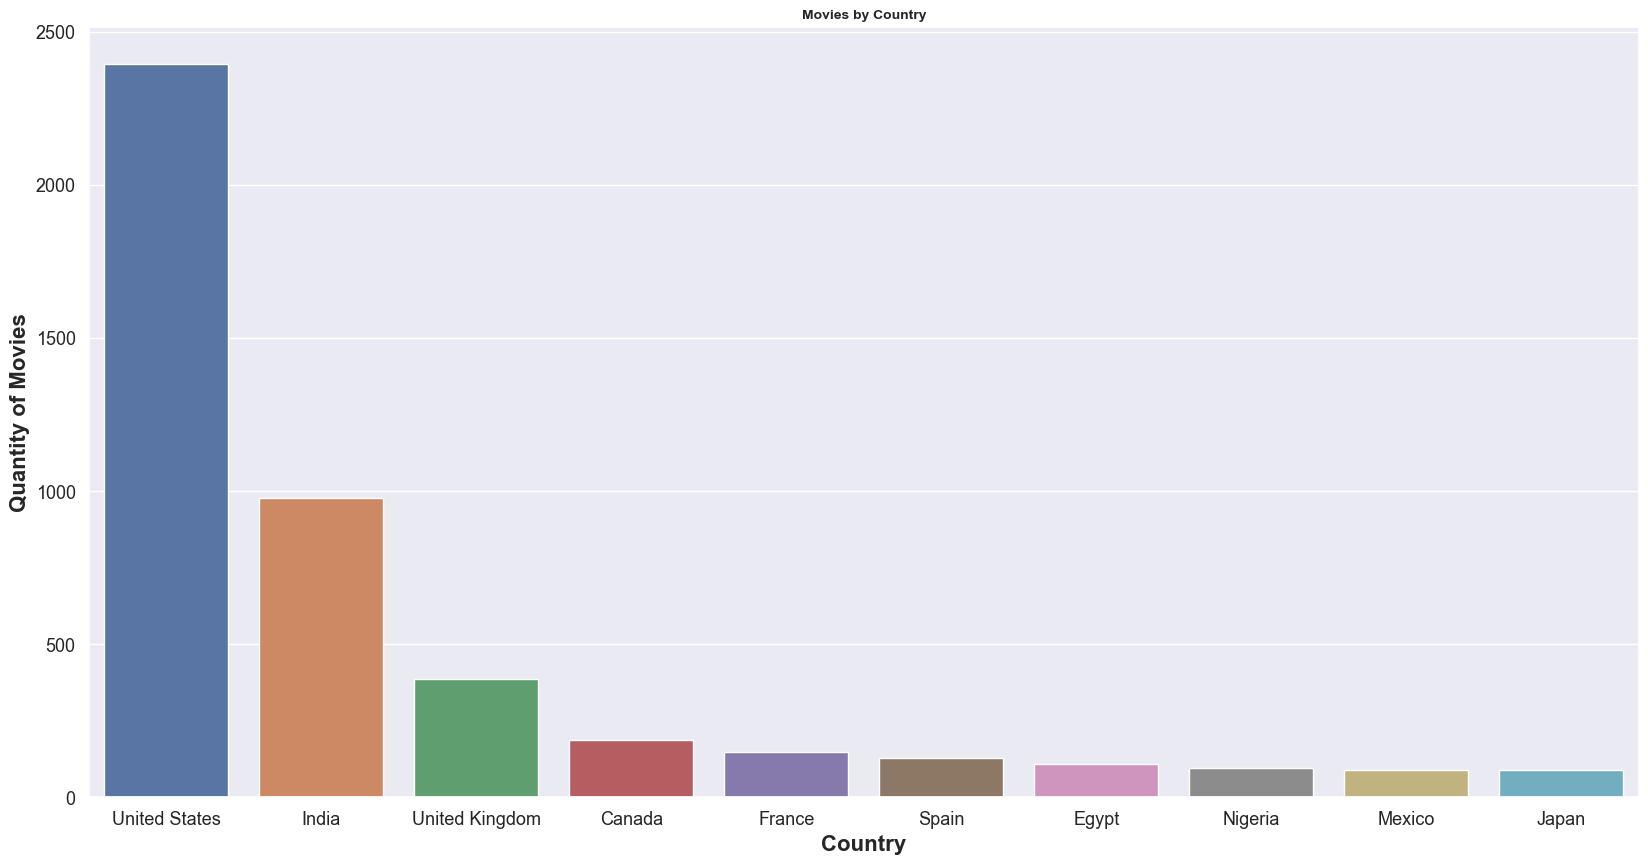

In [46]:
sns.barplot(x=top_10_country_movies.reset_index()['country'], y=top_10_country_movies.reset_index()['count'])
plt.title('Movies by Country', fontsize=10, fontweight='bold')
plt.xlabel('Country', fontsize=16, fontweight='bold')
plt.ylabel('Quantity of Movies', fontsize=16, fontweight='bold')
sns.set(rc={'figure.figsize': (20, 10)})
plt.xticks(rotation=360, fontsize=13)  
plt.yticks(rotation=360, fontsize=13) 
plt.show()

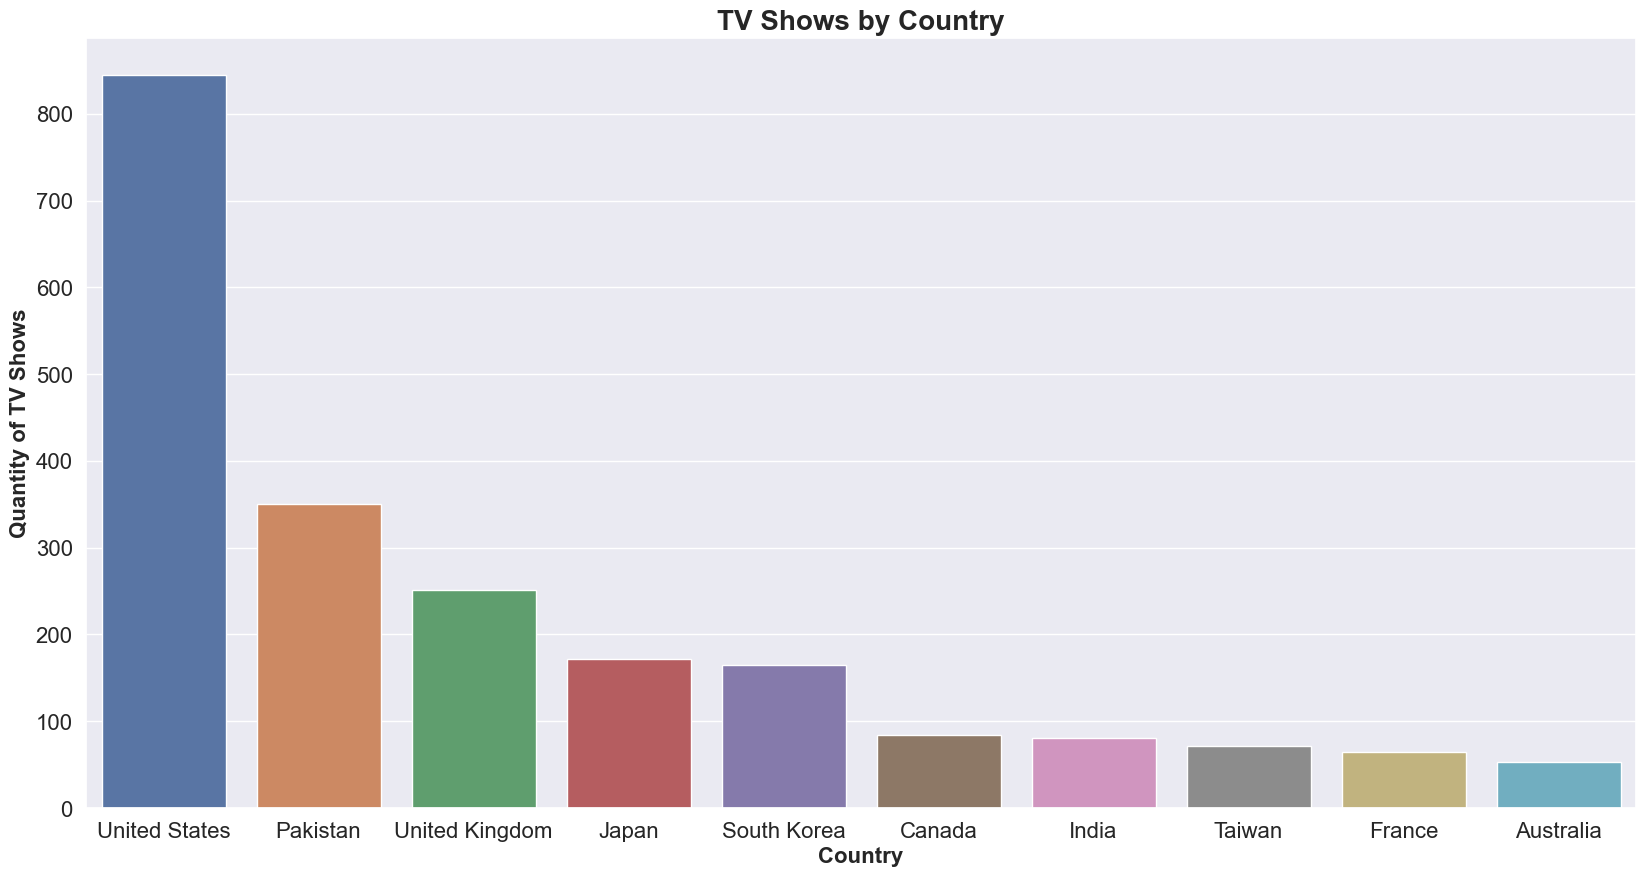

In [42]:
sns.barplot(x=top_10_country_tv.reset_index()['country'], y=top_10_country_tv.reset_index()['count'])
plt.title('TV Shows by Country', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, fontweight='bold')
plt.ylabel('Quantity of TV Shows', fontsize=16, fontweight='bold')
sns.set(rc={'figure.figsize': (20, 10)})
plt.xticks(rotation=360, fontsize=16)  
plt.yticks(rotation=360, fontsize=16) 
plt.show()

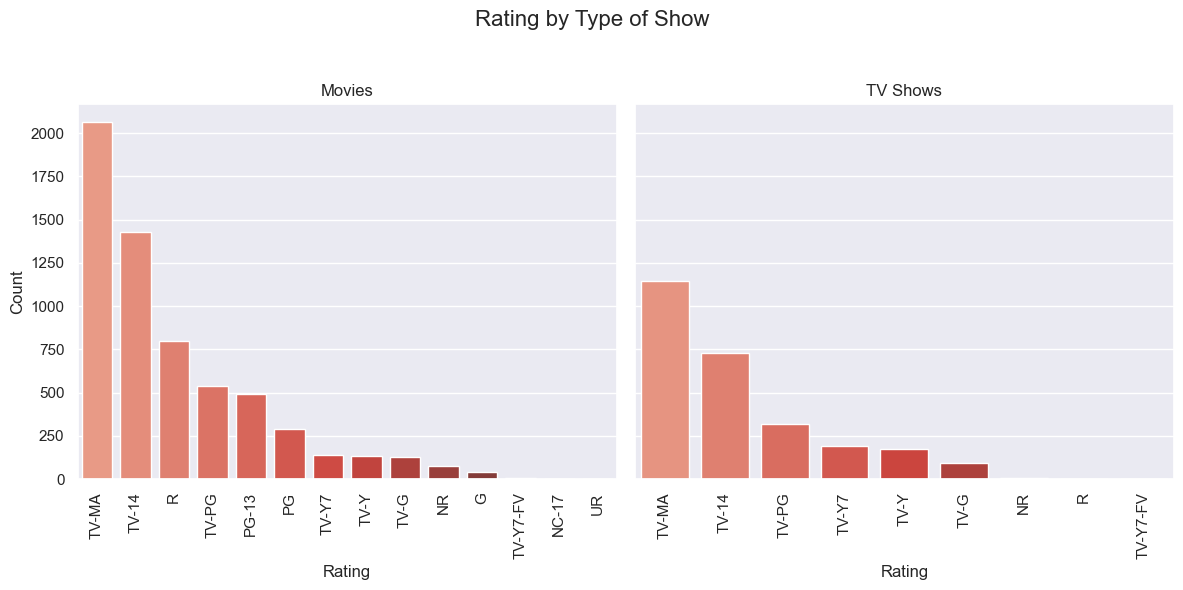

In [43]:
movies = data.loc[data["type"] == "Movie", "rating"].value_counts()
tv_show = data.loc[data["type"] == "TV Show", "rating"].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.barplot(x=movies.index, y=movies.values, ax=axes[0], palette="Reds_d")
axes[0].set_title("Movies")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x=tv_show.index, y=tv_show.values, ax=axes[1], palette="Reds_d")
axes[1].set_title("TV Shows")
axes[1].set_xlabel("Rating")
axes[1].tick_params(axis='x', rotation=90)
fig.suptitle("Rating by Type of Show", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

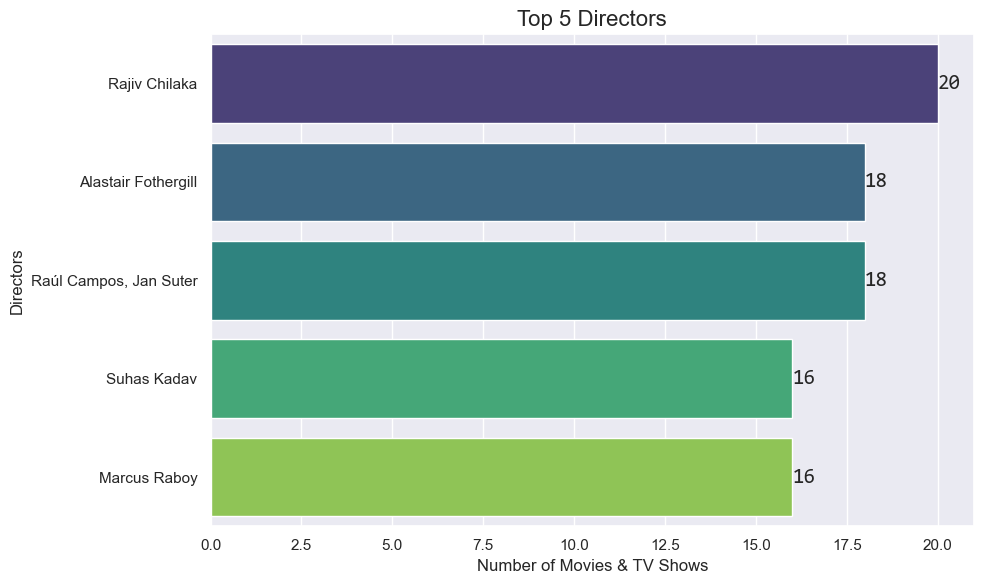

In [47]:
directors = data["director"].value_counts()[1:6]
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=directors.values, 
    y=directors.index, 
    palette="viridis", 
    ax=ax
)
for index, value in enumerate(directors.values):
    ax.text(value, index, f'{value}', va='center', ha='left', fontfamily='consolas', fontsize=15)
ax.set_xlabel("Number of Movies & TV Shows", fontsize=12)
ax.set_ylabel("Directors", fontsize=12)
ax.set_title("Top 5 Directors", fontsize=16)
plt.tight_layout()
plt.show()

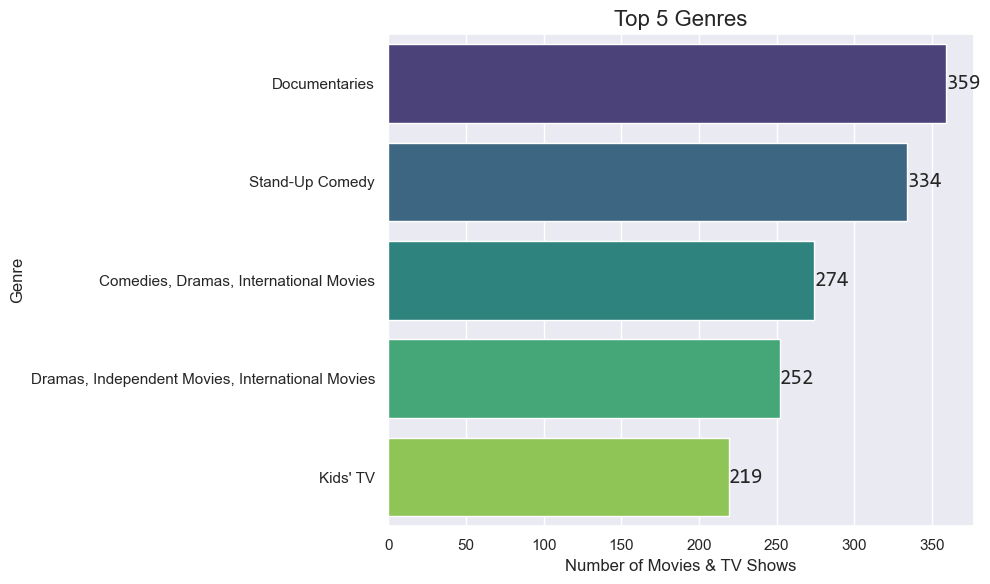

In [48]:
genre = data["listed_in"].value_counts()[1:6]
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=genre.values, 
    y=genre.index, 
    palette="viridis", 
    ax=ax
)
for index, value in enumerate(genre.values):
    ax.text(value, index, f'{value}', va='center', ha='left', fontfamily='consolas', fontsize=15)
ax.set_xlabel("Number of Movies & TV Shows", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)
ax.set_title("Top 5 Genres", fontsize=16)
plt.tight_layout()
plt.show()

## Conclusion: 

1. **Popularity of Movies vs. TV Shows on Netflix:** Movies dominate Netflix's content library, indicating a preference among users for the convenience and variety of films. This trend suggests that movies may be more popular due to their shorter viewing time and standalone nature, making them a favored choice for quick entertainment.

2. **Content Production Dominance by the United States:** The United States leads in content production on Netflix, with the highest number of both movies and TV shows. This reflects the strength of the U.S. entertainment industry and its global appeal, which allows American content to be a major draw for Netflix's diverse audience.

3. **Documentaries as the Most Prevalent Genre:** Documentaries are the most common genre on Netflix, with 359 titles. This emphasizes Netflix's focus on providing educational and real-world content, catering to an audience interested in informative and thought-provoking viewing experiences.

4. **Rajiv Chilaka's Contribution to Netflix:** Rajiv Chilaka stands out as the most prolific director on Netflix, particularly in the animation genre. His work has significantly expanded Netflix's offerings for younger audiences, reinforcing the importance of family-friendly content on the platform.